In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Fisher_Forecaster import Fisher_Forecaster
import pyccl as ccl

In [3]:
h = 0.72
h3 = h**3

# We compare the power spectrum for CosmoSIS and CCL

## Linear P(k)

### Cosmosis P(k)

cosmosis_lin_pk = np.loadtxt("ccl_cosmosis_pk_comparison/cosmosis/matter_power_lin/p_k.txt")/h3
cosmosis_lin_z = np.loadtxt("ccl_cosmosis_pk_comparison/cosmosis/matter_power_lin/z.txt")
cosmosis_lin_k = np.loadtxt("ccl_cosmosis_pk_comparison/cosmosis/matter_power_lin/k_h.txt")*h

In [4]:
a = 1/(1+cosmosis_lin_z) # convert to scale factor

In [5]:
cosmosis_lin_pk_df = pd.DataFrame(cosmosis_lin_pk, index=cosmosis_lin_z)
cosmosis_lin_pk_df.index.names = ["z"]
cosmosis_lin_pk_df.columns.names = [r'$k (Mpc^{-1})$']
cosmosis_lin_pk_df.rename(columns={i: cosmosis_lin_k[i] for i in range(len(cosmosis_lin_k))}, inplace=True)
cosmosis_lin_pk_df = cosmosis_lin_pk_df.T

In [15]:
cosmosis_lin_pk_df.head()

z,0.00,0.04,0.08,0.12,0.16,0.20,0.24,0.28,0.32,0.36,...,3.64,3.68,3.72,3.76,3.80,3.84,3.88,3.92,3.96,4.00
$k (Mpc^{-1})$,,,,,,,,,,,,,,,,,,,,,
0.000007,140.855075,135.242715,129.847432,124.667912,119.701498,114.944491,110.392263,106.039416,101.880044,97.907770,...,11.319163,11.129859,10.945207,10.765054,10.589256,10.417681,10.250189,10.086662,9.926970,9.771000
0.000008,155.052389,148.874330,142.935212,137.233570,131.766538,126.530035,121.518943,116.727358,112.148717,107.776039,...,12.460010,12.251628,12.048363,11.850052,11.656536,11.467666,11.283297,11.103286,10.927500,10.755808
0.000009,170.680952,163.880105,157.342262,151.065867,145.047753,139.283404,133.767194,128.492606,123.452442,118.639009,...,13.715842,13.486455,13.262703,13.044405,12.831387,12.623480,12.420529,12.222375,12.028871,11.839874
0.000010,187.885008,180.398531,173.201645,166.292538,159.667784,153.322351,147.250078,141.443798,135.895600,130.596965,...,15.098246,14.845742,14.599436,14.359135,14.124650,13.895790,13.672381,13.454253,13.241246,13.033203
0.000011,206.823485,198.582236,190.659829,183.054164,175.761566,168.776506,162.092104,155.700516,149.593033,143.760298,...,16.619977,16.342023,16.070895,15.806375,15.548250,15.296325,15.050403,14.810288,14.575812,14.346803


### CCL P(k)

In [6]:
probe = "lensing"
bin_type = "equal_size"
nbins = 5
deriv_order = 2
derivs_to_calc = "all"
use_binned = True

In [7]:
F = Fisher_Forecaster(probe, bin_type, nbins, deriv_order, derivs_to_calc, use_binned=use_binned)

In [8]:
ccl_lin_pk = np.zeros(cosmosis_lin_pk.shape)
for i in range(len(a)):
    ccl_lin_pk[i] = ccl.linear_matter_power(F.cosmo, cosmosis_lin_k, a[i])

In [9]:
ccl_lin_pk_df = pd.DataFrame(ccl_lin_pk, index=cosmosis_lin_z)
ccl_lin_pk_df.index.names = ["z"]
ccl_lin_pk_df.columns.names = [r'$k (Mpc^{-1})$']
ccl_lin_pk_df.rename(columns={i: cosmosis_lin_k[i] for i in range(len(cosmosis_lin_k))}, inplace=True)
ccl_lin_pk_df = ccl_lin_pk_df.T

In [16]:
ccl_lin_pk_df.head()

z,0.00,0.04,0.08,0.12,0.16,0.20,0.24,0.28,0.32,0.36,...,3.64,3.68,3.72,3.76,3.80,3.84,3.88,3.92,3.96,4.00
$k (Mpc^{-1})$,,,,,,,,,,,,,,,,,,,,,
0.000007,145.281461,139.205792,133.398572,127.855888,122.567742,117.526041,112.720706,108.142907,103.783520,99.633084,...,11.344401,11.154466,10.969209,10.788475,10.612117,10.439997,10.271978,10.107934,9.947742,9.791283
0.000008,159.889968,153.205025,146.815236,140.716329,134.897360,129.349417,124.061475,119.023826,114.226437,109.658921,...,12.486879,12.277819,12.073906,11.874973,11.680857,11.491404,11.306467,11.125904,10.949581,10.777367
0.000009,175.967409,168.612093,161.581294,154.870344,148.467268,142.362251,136.543235,130.999541,125.720145,120.693635,...,13.744415,13.514302,13.289857,13.070892,12.857229,12.648699,12.445139,12.246394,12.052315,11.862760
0.000010,193.661497,185.568584,177.832469,170.448056,163.402241,156.684213,150.280786,144.180214,138.370381,132.838752,...,15.128595,14.875312,14.628266,14.387252,14.152074,13.922545,13.698487,13.479729,13.266107,13.057464
0.000011,213.134773,204.230295,195.718110,187.592652,179.839579,172.446989,165.400458,158.687069,152.293504,146.205998,...,16.652174,16.373386,16.101463,15.836180,15.577321,15.324679,15.078059,14.837273,14.602139,14.372486


### Plots

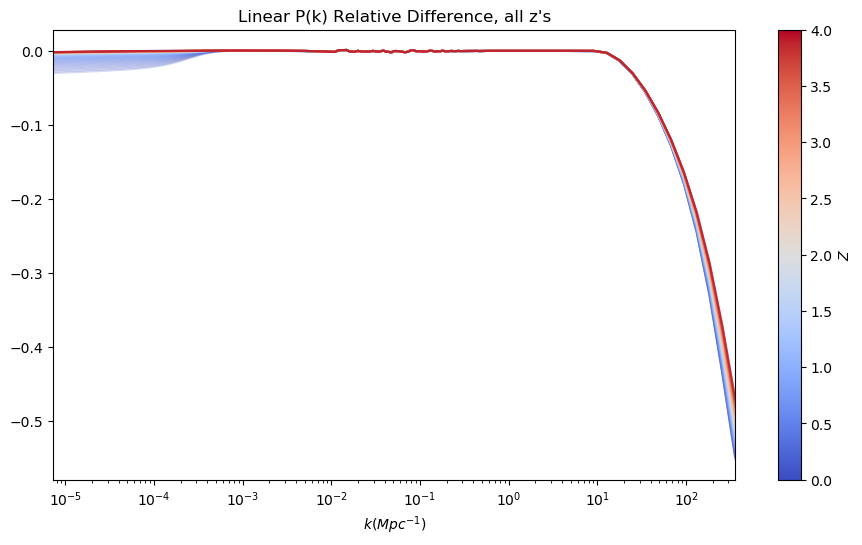

In [18]:
fig, ax = plt.subplots(figsize=(11,6), dpi=100)
sm = plt.cm.ScalarMappable(cmap="coolwarm", 
                           norm=plt.Normalize(vmin=ccl_lin_pk_df.columns[0],
                                              vmax=ccl_lin_pk_df.columns[-1]))
((cosmosis_lin_pk_df - ccl_lin_pk_df)/ccl_lin_pk_df)\
    .plot(alpha=0.2, legend=False, logx=True, ax=ax, colormap="coolwarm")
plt.title("Linear P(k) Relative Difference, all z's")
fig.subplots_adjust(bottom=0.13)
plt.colorbar(sm, label=r'$Z$')
plt.show()

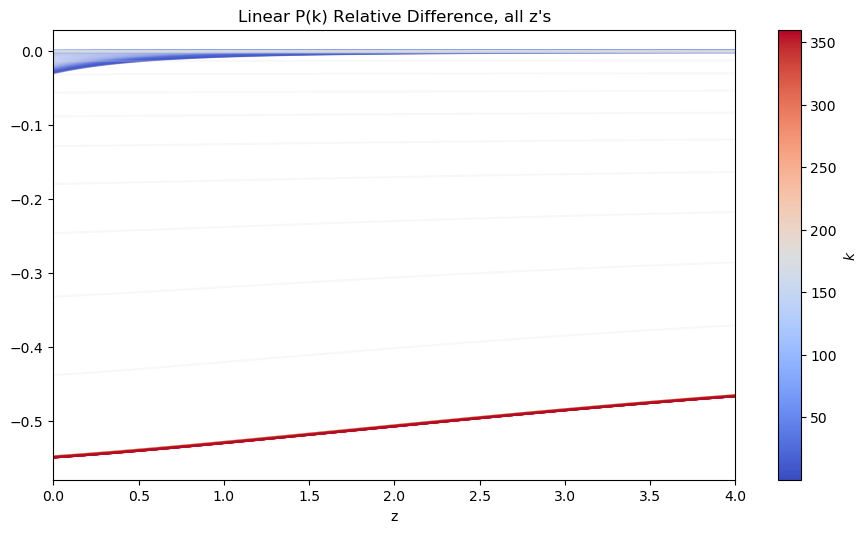

In [26]:
fig, ax = plt.subplots(figsize=(11,6), dpi=100)
sm = plt.cm.ScalarMappable(cmap="coolwarm", 
                           norm=plt.Normalize(vmin=ccl_lin_pk_df.T.columns[0],
                                              vmax=ccl_lin_pk_df.T.columns[-1]))
((cosmosis_lin_pk_df - ccl_lin_pk_df)/ccl_lin_pk_df).T\
    .plot(alpha=0.2, legend=False, logx=False, ax=ax, colormap="coolwarm")
plt.title("Linear P(k) Relative Difference, all z's")
fig.subplots_adjust(bottom=0.13)
plt.colorbar(sm, label=r'$k$')
plt.show()

In [23]:
((cosmosis_lin_pk_df - ccl_lin_pk_df)/ccl_lin_pk_df).T

$k (Mpc^{-1})$,0.000007,0.000008,0.000009,0.000010,0.000011,0.000012,0.000013,0.000015,0.000016,0.000018,...,359.903781,359.914470,359.925160,359.935851,359.946542,359.957233,359.967924,359.978616,359.989308,360.000000
z,,,,,,,,,,,,,,,,,,,,,
0.00,-0.030468,-0.030256,-0.030042,-0.029828,-0.029612,-0.029395,-0.029175,-0.028952,-0.028727,-0.028498,...,-0.549575,-0.549583,-0.549591,-0.549599,-0.549607,-0.549615,-0.549623,-0.549631,-0.549639,-0.549647
0.04,-0.028469,-0.028267,-0.028064,-0.027861,-0.027655,-0.027448,-0.027240,-0.027029,-0.026815,-0.026598,...,-0.548938,-0.548946,-0.548954,-0.548962,-0.548970,-0.548978,-0.548986,-0.548994,-0.549002,-0.549010
0.08,-0.026621,-0.026428,-0.026235,-0.026040,-0.025845,-0.025648,-0.025449,-0.025248,-0.025045,-0.024838,...,-0.548280,-0.548288,-0.548296,-0.548304,-0.548313,-0.548321,-0.548329,-0.548337,-0.548345,-0.548353
0.12,-0.024934,-0.024750,-0.024566,-0.024380,-0.024193,-0.024005,-0.023815,-0.023624,-0.023430,-0.023233,...,-0.547606,-0.547614,-0.547622,-0.547630,-0.547638,-0.547646,-0.547654,-0.547662,-0.547670,-0.547678
0.16,-0.023385,-0.023209,-0.023032,-0.022854,-0.022676,-0.022496,-0.022314,-0.022131,-0.021946,-0.021758,...,-0.546920,-0.546928,-0.546936,-0.546944,-0.546952,-0.546960,-0.546968,-0.546976,-0.546984,-0.546992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.84,-0.002138,-0.002066,-0.001994,-0.001922,-0.001850,-0.001779,-0.001707,-0.001636,-0.001565,-0.001495,...,-0.469637,-0.469644,-0.469651,-0.469658,-0.469665,-0.469672,-0.469679,-0.469686,-0.469694,-0.469701
3.88,-0.002121,-0.002049,-0.001977,-0.001906,-0.001834,-0.001763,-0.001692,-0.001621,-0.001550,-0.001480,...,-0.468924,-0.468931,-0.468938,-0.468945,-0.468952,-0.468959,-0.468966,-0.468973,-0.468980,-0.468987
3.92,-0.002104,-0.002033,-0.001961,-0.001890,-0.001819,-0.001747,-0.001676,-0.001606,-0.001535,-0.001465,...,-0.468216,-0.468223,-0.468230,-0.468237,-0.468244,-0.468251,-0.468258,-0.468265,-0.468272,-0.468280


## Let's look at the Nonlinear Spectrum while we are at it

### Cosmosis P(k)

In [4]:
cosmosis_nl_pk = np.loadtxt("ccl_cosmosis_pk_comparison/cosmosis/matter_power_nl/p_k.txt")/h3
cosmosis_nl_z = np.loadtxt("ccl_cosmosis_pk_comparison/cosmosis/matter_power_nl/z.txt")
cosmosis_nl_k = np.loadtxt("ccl_cosmosis_pk_comparison/cosmosis/matter_power_nl/k_h.txt")*h

In [5]:
a = 1/(1+cosmosis_nl_z) # convert to scale factor

In [6]:
cosmosis_nl_pk_df = pd.DataFrame(cosmosis_nl_pk, index=cosmosis_nl_z)
cosmosis_nl_pk_df.index.names = ["z"]
cosmosis_nl_pk_df.columns.names = [r'$k (Mpc^{-1})$']
cosmosis_nl_pk_df.rename(columns={i: cosmosis_nl_k[i] for i in range(len(cosmosis_nl_k))}, inplace=True)
cosmosis_nl_pk_df = cosmosis_nl_pk_df.T

In [7]:
cosmosis_nl_pk_df.head()

z,0.00,0.04,0.08,0.12,0.16,0.20,0.24,0.28,0.32,0.36,...,3.64,3.68,3.72,3.76,3.80,3.84,3.88,3.92,3.96,4.00
$k (Mpc^{-1})$,,,,,,,,,,,,,,,,,,,,,
0.000007,140.855075,135.242715,129.847432,124.667912,119.701498,114.944491,110.392263,106.039416,101.880044,97.907770,...,11.319163,11.129859,10.945207,10.765054,10.589256,10.417681,10.250189,10.086662,9.926970,9.771000
0.000008,145.733667,139.926921,134.344766,128.985831,123.847390,118.925615,114.215708,109.712101,105.408656,101.298791,...,11.711191,11.515332,11.324284,11.137891,10.956004,10.778487,10.605195,10.436004,10.270782,10.109409
0.000008,150.781245,144.773377,138.997873,133.453307,128.136881,123.044631,118.171584,113.511992,109.059484,104.807263,...,12.116798,11.914155,11.716490,11.523642,11.335455,11.151789,10.972497,10.797445,10.626501,10.459539
0.000008,156.003678,149.787713,143.812152,138.075526,132.574950,127.306318,122.264481,117.443497,112.836763,108.437257,...,12.536451,12.326791,12.122279,11.922752,11.728048,11.538020,11.352520,11.171404,10.994540,10.821795
0.000008,161.407031,154.975752,148.793192,142.857852,137.166748,131.715623,126.499149,121.511176,116.744875,112.192985,...,12.970640,12.753717,12.542122,12.335684,12.134238,11.937628,11.745704,11.558315,11.375325,11.196597


### CCL P(k)

In [8]:
probe = "lensing"
bin_type = "equal_size"
nbins = 5
deriv_order = 2
derivs_to_calc = "all"
use_binned = True

In [9]:
F = Fisher_Forecaster(probe, bin_type, nbins, deriv_order, derivs_to_calc, use_binned=use_binned)

In [10]:
ccl_nl_pk = np.zeros(cosmosis_nl_pk.shape)
for i in range(len(a)):
    ccl_nl_pk[i] = ccl.nonlin_matter_power(F.cosmo, cosmosis_nl_k, a[i])

In [11]:
ccl_nl_pk_df = pd.DataFrame(ccl_nl_pk, index=cosmosis_nl_z)
ccl_nl_pk_df.index.names = ["z"]
ccl_nl_pk_df.columns.names = [r'$k (Mpc^{-1})$']
ccl_nl_pk_df.rename(columns={i: cosmosis_nl_k[i] for i in range(len(cosmosis_nl_k))}, inplace=True)
ccl_nl_pk_df = ccl_nl_pk_df.T

In [12]:
ccl_nl_pk_df.head()

z,0.00,0.04,0.08,0.12,0.16,0.20,0.24,0.28,0.32,0.36,...,3.64,3.68,3.72,3.76,3.80,3.84,3.88,3.92,3.96,4.00
$k (Mpc^{-1})$,,,,,,,,,,,,,,,,,,,,,
0.000007,145.305607,139.228183,133.419329,127.875127,122.585571,117.542563,112.736016,108.157097,103.796672,99.645277,...,11.344527,11.154587,10.969325,10.788586,10.612225,10.440100,10.272078,10.108030,9.947833,9.791371
0.000008,150.326159,144.039317,138.030227,132.294848,126.822846,121.605844,116.633428,111.896461,107.385499,103.090759,...,11.737127,11.540615,11.348942,11.161949,10.979485,10.801404,10.627568,10.457843,10.292104,10.130228
0.000008,155.520178,149.016703,142.800476,136.867327,131.206587,125.809587,120.665577,115.765107,111.098413,106.655378,...,12.143314,11.940002,11.741697,11.548234,11.359456,11.175212,10.995361,10.819763,10.648289,10.480811
0.000008,160.893660,154.166087,147.735582,141.597843,135.741856,130.158647,124.837122,119.767506,114.939702,110.343251,...,12.563557,12.353210,12.148043,11.947886,11.752576,11.561957,11.375882,11.194209,11.016800,10.843528
0.000008,166.452804,159.493412,152.841243,146.491860,140.433890,134.658049,129.152883,123.908282,118.913806,114.158643,...,12.998344,12.780719,12.568452,12.361369,12.159301,11.962086,11.769572,11.581612,11.398065,11.218797


### Plots

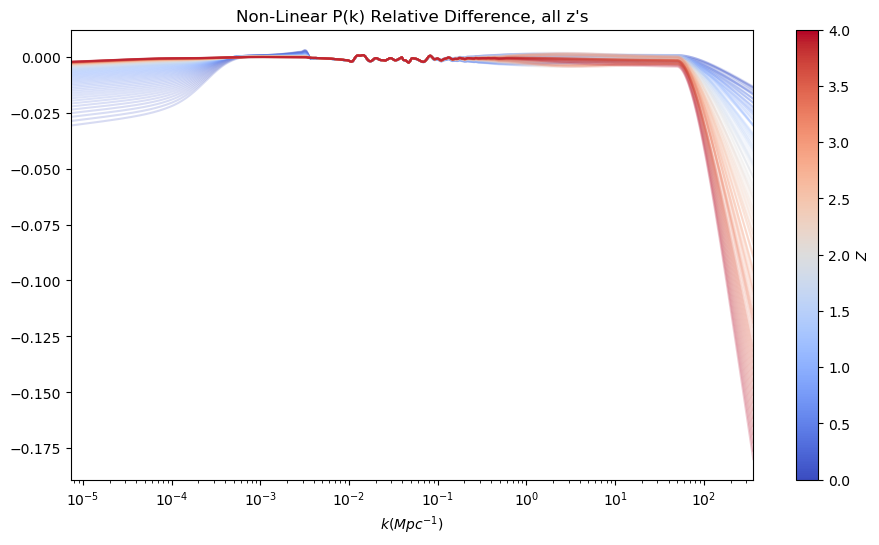

In [13]:
fig, ax = plt.subplots(figsize=(11,6), dpi=100)
sm = plt.cm.ScalarMappable(cmap="coolwarm", 
                           norm=plt.Normalize(vmin=ccl_nl_pk_df.columns[0],
                                              vmax=ccl_nl_pk_df.columns[-1]))
((cosmosis_nl_pk_df - ccl_nl_pk_df)/ccl_nl_pk_df)\
    .plot(alpha=0.2, legend=False, logx=True, ax=ax, colormap="coolwarm")
plt.title("Non-Linear P(k) Relative Difference, all z's")
fig.subplots_adjust(bottom=0.13)
plt.colorbar(sm, label=r'$Z$')
plt.show()

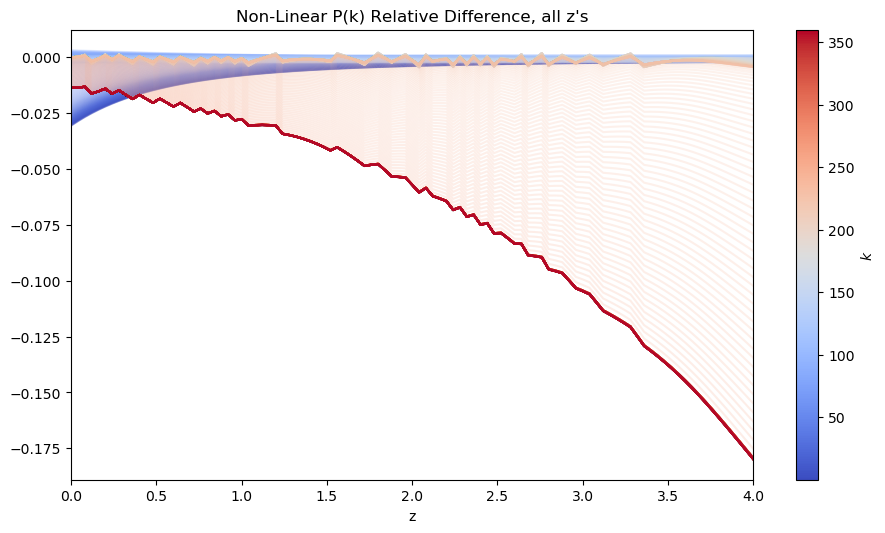

In [15]:
fig, ax = plt.subplots(figsize=(11,6), dpi=100)
sm = plt.cm.ScalarMappable(cmap="coolwarm", 
                           norm=plt.Normalize(vmin=ccl_nl_pk_df.T.columns[0],
                                              vmax=ccl_nl_pk_df.T.columns[-1]))
((cosmosis_nl_pk_df - ccl_nl_pk_df)/ccl_nl_pk_df).T\
    .plot(alpha=0.2, legend=False, logx=False, ax=ax, colormap="coolwarm")
plt.title("Non-Linear P(k) Relative Difference, all z's")
fig.subplots_adjust(bottom=0.13)
plt.colorbar(sm, label=r'$k$')
plt.show()